<h3>Intro</h3>

The problem that underlies this project is stated here:
https://www.kaggle.com/codersree/mount-rainier-weather-and-climbing-data

<b>Briefly:</b><br>
We'll go through the EDA and build a prediction model that predicts the Success Rate of climbing, using weather data, in the end.<br>
Enjoy the reading.

In [1]:
# Import essential libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl


# Set my favourite matplotlib style

mpl.style.use('ggplot')

In [2]:
# Define a parsing function and the date format to detect

dateparse = lambda x: pd.datetime.strptime(x, '%m/%d/%Y')

# Load and parse a Date column simultaneously

df = pd.read_csv('climbing_statistics.csv', parse_dates=['Date'], date_parser=dateparse)
df.sort_values('Date').head(4)

,Date,Route,Attempted,Succeeded,Success Percentage
4076,2014-01-04,Gibralter Ledges,3,2,0.666667
4075,2014-01-05,Disappointment Cleaver,2,0,0.000000
4073,2014-01-06,Disappointment Cleaver,8,0,0.000000
4074,2014-01-06,Disappointment Cleaver,8,0,0.000000


In [3]:
# Now, load Rainier_Weather dataset and parse a Date column as previously

wth = pd.read_csv('Rainier_Weather.csv', parse_dates=['Date'], date_parser=dateparse)
wth.sort_values('Date').head(4)

,Date,Battery Voltage AVG,Temperature AVG,Relative Humidity AVG,Wind Speed Daily AVG,Wind Direction AVG,Solare Radiation AVG
463,2014-09-23,13.056667,32.857333,100.000000,65.110667,254.273333,16.593800
462,2014-09-24,13.168750,29.702917,100.000000,45.915000,278.054167,37.873708
461,2014-09-25,13.648333,26.823750,99.854167,3.166208,278.604167,142.698917
460,2014-09-26,13.532500,28.238333,100.000000,0.897625,259.645833,114.400833


In [4]:
wth.describe()

,Battery Voltage AVG,Temperature AVG,Relative Humidity AVG,Wind Speed Daily AVG,Wind Direction AVG,Solare Radiation AVG
count,464.000000,464.000000,464.000000,464.000000,464.000000,464.000000
mean,13.478067,28.022615,62.548556,13.015701,199.444755,109.065308
std,0.214160,11.898322,28.401976,13.812058,79.859904,115.901186
min,12.827917,-0.165958,9.659917,0.000000,13.490000,0.000000
25%,13.445417,19.074167,38.161458,2.917646,157.307271,5.980437
50%,13.520625,27.355000,64.097708,8.708458,227.469375,68.678292
75%,13.605937,36.115208,91.429167,18.727010,257.727083,196.036177
max,13.856250,56.153750,100.000000,65.853333,324.579167,368.056083


In [5]:
df.describe(include='all')

,Date,Route,Attempted,Succeeded,Success Percentage
count,4077,4077,4077.000000,4077.000000,4077.000000
unique,391,26,NaN,NaN,NaN
top,2014-07-11 00:00:00,Disappointment Cleaver,NaN,NaN,NaN
freq,51,2728,NaN,NaN,NaN
first,2014-01-04 00:00:00,NaN,NaN,NaN,NaN
last,2015-11-27 00:00:00,NaN,NaN,NaN,NaN
mean,NaN,NaN,5.139318,2.710817,0.498999
std,NaN,NaN,3.813516,3.534148,0.512050
min,NaN,NaN,1.000000,0.000000,0.000000
25%,NaN,NaN,2.000000,0.000000,0.000000


At this stage, we'll skip dataset structure analysis and will back to it several cells later.

In [6]:
# Merge climbing and weather datasets on the Date columns

dfm = df.merge(wth, on='Date')

In [7]:
# Then, sort Date values ascending and reset index

dfm.sort_values('Date', inplace=True)
dfm.reset_index(drop=True, inplace=True)
dfm.head(3)

,Date,Route,Attempted,Succeeded,Success Percentage,Battery Voltage AVG,Temperature AVG,Relative Humidity AVG,Wind Speed Daily AVG,Wind Direction AVG,Solare Radiation AVG
0,2014-09-23,Disappointment Cleaver,11,0,0.0,13.056667,32.857333,100.000000,65.110667,254.273333,16.593800
1,2014-09-24,Disappointment Cleaver,12,0,0.0,13.168750,29.702917,100.000000,45.915000,278.054167,37.873708
2,2014-09-25,Disappointment Cleaver,2,2,1.0,13.648333,26.823750,99.854167,3.166208,278.604167,142.698917


Now, let's look into the data we've got:

In [8]:
dfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1895 entries, 0 to 1894
Data columns (total 11 columns):
Date                     1895 non-null datetime64[ns]
Route                    1895 non-null object
Attempted                1895 non-null int64
Succeeded                1895 non-null int64
Success Percentage       1895 non-null float64
Battery Voltage AVG      1895 non-null float64
Temperature AVG          1895 non-null float64
Relative Humidity AVG    1895 non-null float64
Wind Speed Daily AVG     1895 non-null float64
Wind Direction AVG       1895 non-null float64
Solare Radiation AVG     1895 non-null float64
dtypes: datetime64[ns](1), float64(7), int64(2), object(1)
memory usage: 162.9+ KB


The dataset is complete, without NaNs, all features have proper types

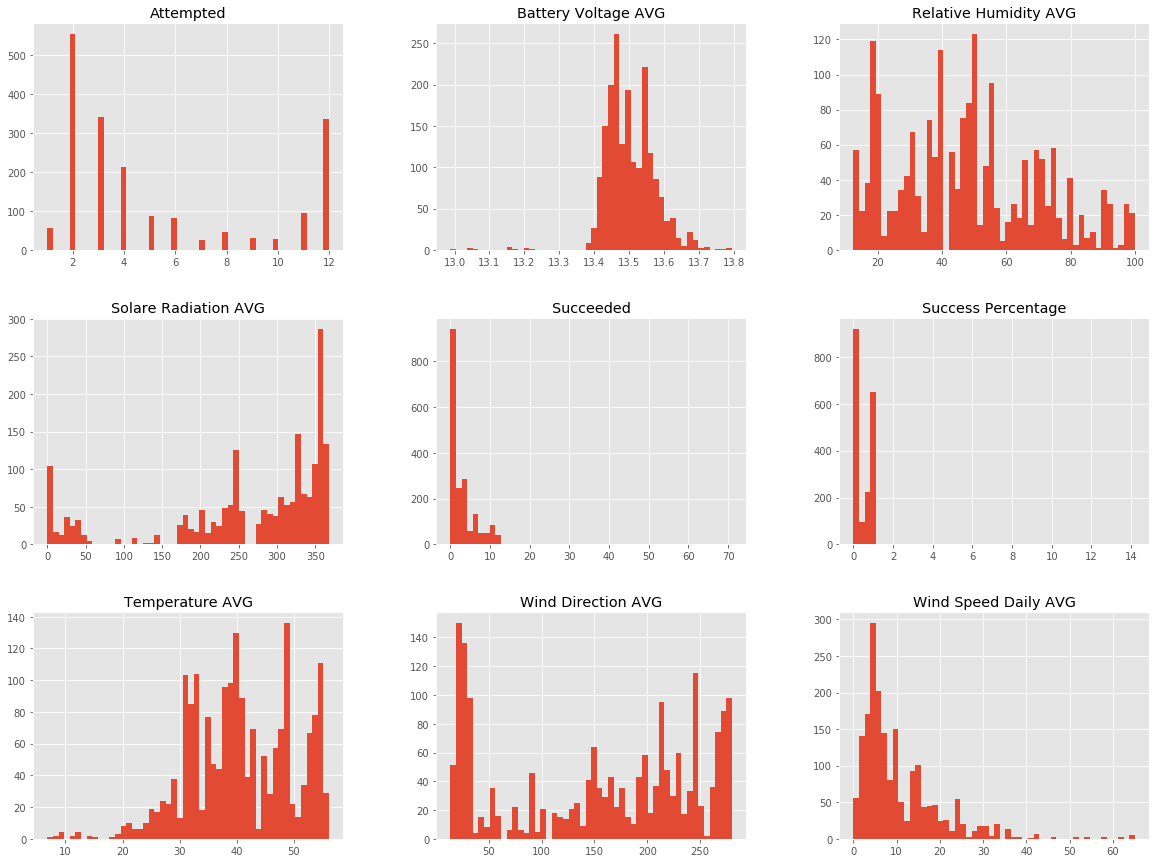

In [9]:
# Lets see histograms for all numeric features

df_countable = dfm._get_numeric_data()
df_countable.hist(bins = 50, figsize=(20,15))
plt.show()

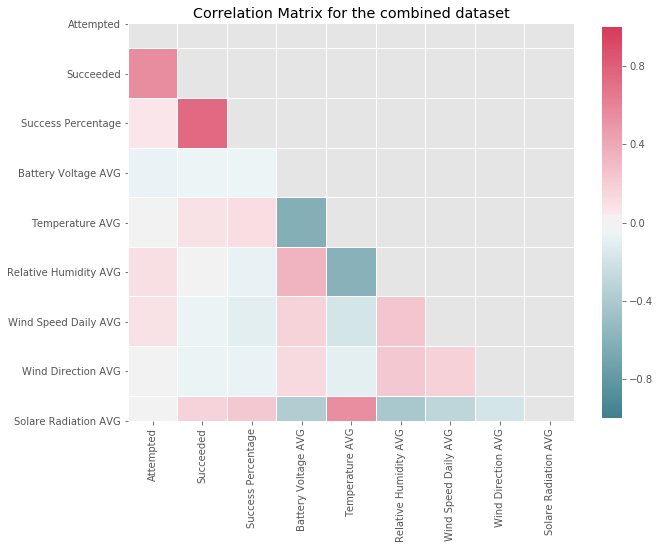

In [10]:
# Now plot a correlation matrix:

corr = df_countable.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(10, 9))

cmap = sns.diverging_palette(210, 5, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.1, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix for the combined dataset')

plt.show()

In [11]:
dfm.describe(include='all')

,Date,Route,Attempted,Succeeded,Success Percentage,Battery Voltage AVG,Temperature AVG,Relative Humidity AVG,Wind Speed Daily AVG,Wind Direction AVG,Solare Radiation AVG
count,1895,1895,1895.000000,1895.000000,1895.000000,1895.000000,1895.000000,1895.000000,1895.000000,1895.000000,1895.000000
unique,204,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2015-07-03 00:00:00,Disappointment Cleaver,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,46,1294,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,2014-09-23 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2015-11-27 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,5.360422,2.616359,0.460795,13.502638,40.711181,47.828637,10.503668,155.335106,261.602649
std,NaN,NaN,3.906702,3.705221,0.559630,0.070450,9.104555,22.154579,9.149581,91.106436,110.452313
min,NaN,NaN,1.000000,0.000000,0.000000,12.987917,6.834833,12.363500,0.000000,13.490000,0.000000
25%,NaN,NaN,2.000000,0.000000,0.000000,13.453333,33.376667,30.057083,4.453854,55.173375,221.494000


<b>What we can notice from the table above and the correlation matrix:</b>
1. 'Success Percentage' feature has an unexpected value of 14.2%, this is clearly an outlier (because '<b>Success Percentage</b>'  $\subseteq [0, 1]$). To preserve observations, I prefer to fix it the following way: where the values > 1, we'll make them = 1. Additionally, all succeeded attempts we'll make = number of attempts where they exceed.<br>

2. There is a strong correlation between 'Succeeded' and 'Success Percentage' (logically), so we'll drop 'Succeeded' column.<br>
3. 'Battery Voltage AVG' indicated the battary voltage and seems to be backward correlated with 'Temperature AVG'. Nevertheless, we'll keep this column.

The cells below are all for the decisions we made previously:

In [12]:
# Let's first rename the target feature column (for convenience purpose only):

dfm.rename(columns={'Success Percentage' : 'SuccPerc'}, inplace=True)

In [13]:
# Bring 'Succeeded' to be equal 'Attempted' where 'Succeeded' > 'Attempted'

dfm.loc[dfm['Succeeded'] > dfm['Attempted'], 'Succeeded'] = dfm['Attempted']

# Now, locate the outliers and bring them to 1.

dfm.loc[dfm['SuccPerc'] > 1, 'SuccPerc'] = 1
dfm['SuccPerc'] = dfm['SuccPerc'].round(2)

For now, I'm going to keep all the columns and see how efficient the model could be. 

Some additional EDA using Time Series:

In [14]:
# Set Date as index

ts = dfm.set_index('Date')

# Sort it

ts.sort_index(inplace=True)

In [15]:
print('The records about climbing successfulness from %s to %s' % (dfm.Date.dt.date.min(), dfm.Date.dt.date.max()))

The records about climbing successfulness from 2014-09-23 to 2015-11-27


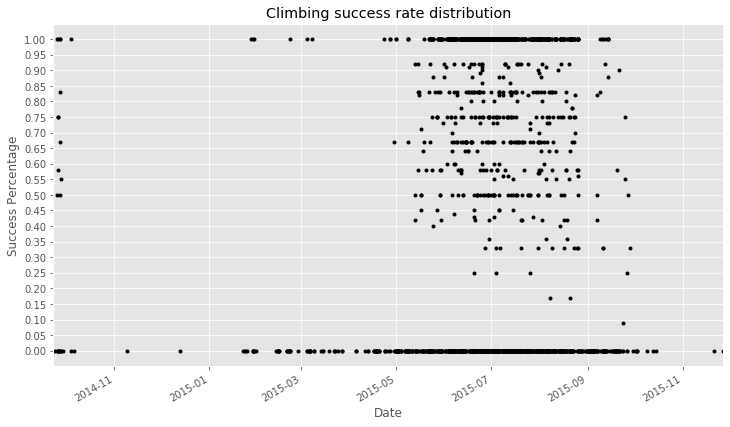

In [16]:
# Brief observation:

ts['SuccPerc'].plot(style='k.', figsize = (12,7))

plt.title('Climbing success rate distribution')
plt.ylabel('Success Percentage')
plt.yticks(np.linspace(0,1,21))
plt.show()

Here we see that a <b>climbing season</b> starts roughly in <b>March</b> and ends in <b>October</b>. So, let's consider only this interval

In [17]:
# Set the range

ts_mo = ts['2015-03-01':'2015-10-01']

In [18]:
ts_mo.shape

(1825, 10)

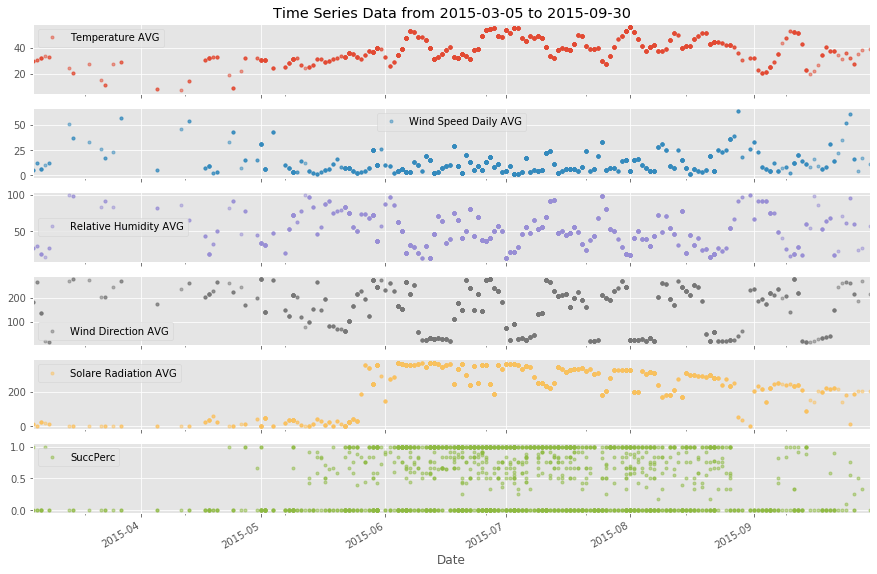

In [19]:
# Tiseries Multiplotting

cols_plot = ['Temperature AVG', 'Wind Speed Daily AVG', 'Relative Humidity AVG', 'Wind Direction AVG','Solare Radiation AVG', 'SuccPerc']


axes = ts_mo[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(15, 10), subplots=True)

for i, ax in enumerate(axes):
    ax.title.set_text('Time Series Data from {} to {}'.format(str(ts_mo.index.date.min()), str(ts_mo.index.date.max())))
    break


plt.show()


As we can notice here, Wind Direction has strong correlation with Relative Humidity. The same is for Wind Speed.<br>
Another point to make is that <b>SuccPerc</b> $\subseteq [0] \cup [0.5, 1]$ for the most cases.

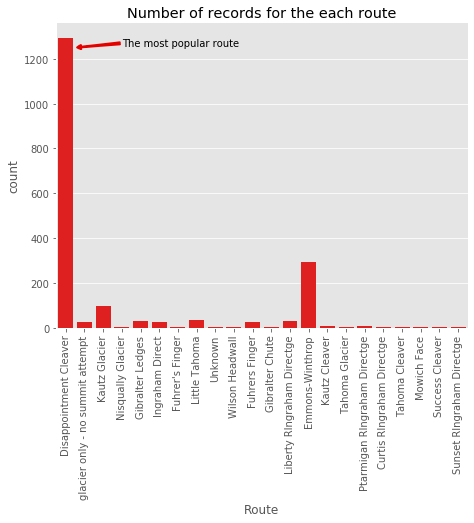

In [20]:
g = sns.catplot(x = 'Route', data=dfm, aspect=1.5, kind="count", color="r")
g.set_xticklabels(rotation=90)
plt.title('Number of records for the each route')
plt.annotate('The most popular route',
             xy=(3,1250),
             rotation=0,
             va='bottom',
             ha='left',
            )

plt.annotate('',
             xy=(0.5, 1250),
             xytext=(3, 1270),
             xycoords='data',
             arrowprops=dict(arrowstyle='fancy ,head_length=0.4,head_width=0.4,tail_width=0.2',
                             connectionstyle='arc3', 
                             color='xkcd:red', 
                             lw=2
                            ))
plt.show()

Combine "Fuhrer's Finger" and "Fuhrers Finger"

In [21]:
dfm.Route.replace("Fuhrer's Finger", "Fuhrers Finger", inplace=True)

<b>Before we continue, I want to make an important note:</b>

All <b>Regression models</b> I tried to build showed very poor accuracy ~10%. That is why all further predictions will be based on <b>Classification</b> models.

The main idea of my further exploration is that each route has its own features such as its difficulty, the way wind blows there and many others.<br>
That is why I'm going to consider each route separately.<br>
The case where the model was be based on all routes' observations was also examined and the average accuracy score was 58%.<br> I hope it will be higher after we split the dataset on routes.

In [22]:
# Create dummies for the routes

dummy_r = pd.get_dummies(dfm['Route'])

# Concatenate dummies to the dfm

dfd = pd.concat([dfm,dummy_r], axis=1).drop('Route', axis=1)

Another important decision here is binning. We will try to predict three variants of success criterion: Low, Medium, High.

In [23]:
# Create bins [0,35%] , [35%,65%], [65%, 100%]

bins = [0,0.35,0.65,1]

# Give names to the bins

group_names = ['Low', 'Medium', 'High']

# Add SuccBinned column to the dataset

dfd['SuccBinned'] = pd.cut(dfd['SuccPerc'], bins, labels=group_names, include_lowest=True)

In [24]:
# Calculate the amount of the each bin
dfd.SuccBinned.value_counts()

Low       934
High      832
Medium    129
Name: SuccBinned, dtype: int64

In [25]:
# Import libraries for RandomForest models development, accuracy evaluation and train/test/split procedure

from sklearn.ensemble import RandomForestClassifier 
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [26]:
# Now we walk through each route and create a data frame with the corresponding name.

routes = dfd.columns.to_list()[10:-1]

# Initialize an empty list to add all generated data frames' names

new_list = []

# Main assigning loop:

for r in routes:
    rn = r.lower()
    rn = rn.replace(' ', '').replace('-', '_').replace("'", '') # We also want to bring the df names to more safe view
    
    globals()['df_' + rn] = dfd.loc[dfd[r] == 1] # Generate dataframe
    globals()['df_' + rn].drop(routes, axis=1, inplace=True) # Drop unnecessary columns
    
    new_list.append('df_' + rn) # Add the name to the list

D:\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [27]:
# Check the list

pd.DataFrame(data= {'list of df names' : new_list}).head()

,list of df names
0,df_curtisringrahamdirectge
1,df_disappointmentcleaver
2,df_emmons_winthrop
3,df_fuhrersfinger
4,df_gibralterchute


In [28]:
# Check the df created

df_disappointmentcleaver.head(2)

,Date,Attempted,Succeeded,SuccPerc,Battery Voltage AVG,Temperature AVG,Relative Humidity AVG,Wind Speed Daily AVG,Wind Direction AVG,Solare Radiation AVG,SuccBinned
0,2014-09-23,11,0,0.0,13.056667,32.857333,100.0,65.110667,254.273333,16.593800,Low
1,2014-09-24,12,0,0.0,13.168750,29.702917,100.0,45.915000,278.054167,37.873708,Low


Everything looks awesome so far. Now let's go straight forward and build a classification model based on RandomForest algorithm without tuning, as is.

In [29]:
# Create a function that trains a RF model and returns its accuracy, based on testing dataset. 
# We do not consider dataframes with a number of observations <= 5

def rf_training(df):
    if len(df) > 5:
        temp = df.drop(['Succeeded', 'SuccPerc'], axis=1) 
        x_tr, x_tst, y_tr, y_tst = train_test_split(temp.iloc[:,1:-1], temp['SuccBinned'], test_size=0.2, random_state=1)

        rfc = RandomForestClassifier(n_estimators = 100)
        rfc.fit(x_tr,y_tr)
        yhat = rfc.predict(x_tst)
        return metrics.accuracy_score(y_tst, yhat)
    
    else:
        return -1
    

In [77]:
# Initialize a dictionary where we'll add information about the route and a base model's accuracy built for it 
# Its view: {'route' : accuracy}

dic = {}

# Fill the dictionary

for i,v in enumerate(new_list):
    dic[v] = rf_training(globals()[v])

In [78]:
# Create df from the dictionary

success = pd.DataFrame(dic, index=['before tuning'])

# Filter models that have less than 6 observations

success = success.T.loc[success.T['before tuning'] != -1]

# Show the df

success

,before tuning
df_disappointmentcleaver,0.482625
df_emmons_winthrop,0.559322
df_fuhrersfinger,0.714286
df_gibralterledges,0.833333
df_ingrahamdirect,1.000000
df_kautzcleaver,0.000000
df_kautzglacier,0.300000
df_libertyringrahamdirectge,0.333333
df_littletahoma,0.500000
df_ptarmiganringrahamdirectge,0.500000


These are the values of models' accuracy for each route (before tuning)

The next step is attempt to improve the accuracy, changing models' parameters

In [30]:
# The tuning function

def rf_tuning(df, mode = 'p'):
    
# Create train and test sets
    temp = df.drop(['Succeeded', 'SuccPerc'], axis=1) 
    x_tr, x_tst, y_tr, y_tst = train_test_split(temp.iloc[:,1:-1], temp['SuccBinned'], test_size=0.2, random_state=1)
    
#     Tune min_samples_leaf   
    a = {}
    samp = []
    for sam in range(2,25):            
        rfc = RandomForestClassifier(n_estimators = 100,
                                n_jobs = -1,
                                max_features = "auto",
                                random_state = 1,
                                min_samples_leaf=sam)
        rfc.fit(x_tr,y_tr)
        yhat = rfc.predict(x_tst)
        a[sam] = metrics.accuracy_score(y_tst, yhat)
        samp.append(metrics.accuracy_score(y_tst, yhat))
        
    for s, val in a.items():   
        if val == max(samp):
            max_sam = s
            
#     Tune n_estimators        
    b = {}
    est = []
    for tr in range(100,2000,100):
        rfc = RandomForestClassifier(n_estimators = tr,
                                n_jobs = -1,
                                max_features = "auto",
                                random_state = 888,
                                min_samples_leaf = max_sam)
        rfc.fit(x_tr,y_tr)
        yhat = rfc.predict(x_tst)
        b[tr] = metrics.accuracy_score(y_tst, yhat)
        est.append(metrics.accuracy_score(y_tst, yhat))
    
    for e, val in b.items():   
        if val == max(est):
            max_est = e
            
#     Tune max_features      
    results3 = []
    mf_opt=["auto", None, "sqrt", "log2", 0.9, 0.2]
    for max_f in mf_opt:
        rfc = RandomForestClassifier(n_estimators = max_est,
                                n_jobs = -1,
                                max_features = max_f,
                                random_state = 888,
                                min_samples_leaf=max_sam)
        rfc.fit(x_tr,y_tr)
        yhat = rfc.predict(x_tst)
        results3.append(metrics.accuracy_score(y_tst, yhat))
        
#     Return best accuracy, df's leght and model's parameters
    if mode == 'p':
        return max(results3), len(temp), [max_est, max_sam, max_f]
    else:
        return rfc, x_tr.columns

In [80]:
# Initialize a dictionary for tuned models

dic1 = {}

# Initialize number of samples in the df

dic_samples = {}

# Initialize a dictionary for model's parameters

dic_bparams = {}

# Fill the tuned dictionary

for r in success.index.to_list():
    dic1[r], dic_samples[r], dic_bparams[r] = rf_tuning(globals()[r], 'p')   

Now it's time to combine it to a single data frame

In [81]:
# Convert dicts to dfs

tuned = pd.DataFrame(dic1, index=['after tuning'])
nsamples = pd.DataFrame(dic_samples, index=['df_size'])

tuned = tuned.T
nsamples = nsamples.T

In [82]:
# Merge all columns into a single dataframe

compare = success.merge(tuned, left_index = True, right_index = True)
compare['improvement'] = (compare['after tuning'] - compare['before tuning'])
compare = compare.merge(nsamples, left_index = True, right_index = True)

compare['num_est'] = 0
compare['min_samp_leaf'] = 0
compare['max_features'] = 0

# Unpack parameters lists

k=0
for key,value in dic_bparams.items():
    for j in range(len(dic_bparams[key])):
        compare.iloc[k,-3+j] = value[j]
    k+=1
compare

,before tuning,after tuning,improvement,df_size,num_est,min_samp_leaf,max_features
df_disappointmentcleaver,0.482625,0.610039,0.127413,1294,100,22,0.2
df_emmons_winthrop,0.559322,0.644068,0.084746,295,1900,3,0.2
df_fuhrersfinger,0.714286,0.714286,0.000000,32,1900,24,0.2
df_gibralterledges,0.833333,0.833333,0.000000,29,1900,24,0.2
df_ingrahamdirect,1.000000,1.000000,0.000000,24,1900,24,0.2
df_kautzcleaver,0.000000,0.500000,0.500000,7,1900,24,0.2
df_kautzglacier,0.300000,0.600000,0.300000,97,100,10,0.2
df_libertyringrahamdirectge,0.333333,0.666667,0.333333,29,1900,8,0.2
df_littletahoma,0.500000,0.625000,0.125000,36,1900,5,0.2
df_ptarmiganringrahamdirectge,0.500000,0.500000,0.000000,8,1900,24,0.2


The next step was to try to improve the accuracy of the most popular route - "Disappointment Cleaver". Unfortunately, any further attempts to improve the accuracy was failed. Neither changing the model nor using a GridSearch technique led to success.

In [31]:
mod, col = rf_tuning(globals()['df_disappointmentcleaver'], 't')

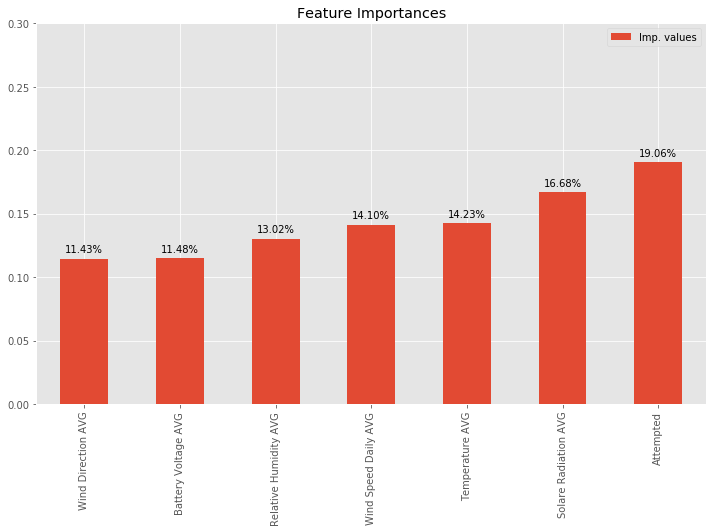

In [32]:
# Let's observe feature importances

t = {}
for f, v in zip(col.values,mod.feature_importances_):
    t[f] = v
    

td = pd.DataFrame(t, index=['Imp. values']).T.sort_values('Imp. values')
td.plot(kind='bar', figsize=(12,7))

for i, v in enumerate(td['Imp. values']):
    plt.annotate('{0:0.2f}%'.format(v*100), xy=(i, v+0.005), ha='center', color='black')
    
plt.ylim(0,0.3)
plt.title('Feature Importances')
plt.show()

Overall, we see that all features contribute to prediction performance.

Here are some EDA I conducted when tried to get some insights on the "Disappointment Cleaver" dataset

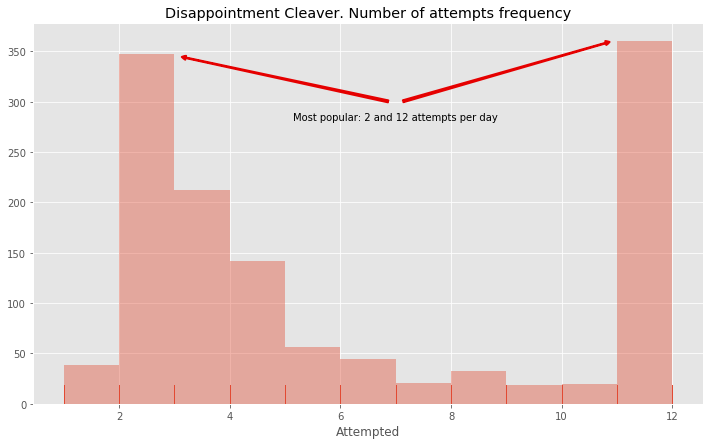

In [33]:
# Now let's plot and observe the frequency of attempts per day

plt.figure(figsize=(12,7))

plt.title("Disappointment Cleaver. Number of attempts frequency")
plt.annotate('',
             xy=(3.1, 345),
             xytext=(6.9, 300),
             xycoords='data',
             arrowprops=dict(arrowstyle='fancy ,head_length=0.4,head_width=0.4,tail_width=0.2',
                             connectionstyle='arc3', 
                             color='xkcd:red', 
                             lw=2
                            ))
plt.annotate('',
             xy=(10.9, 360),
             xytext=(7.1, 300),
             xycoords='data',
             arrowprops=dict(arrowstyle='fancy ,head_length=0.4,head_width=0.4,tail_width=0.2',
                             connectionstyle='arc3', 
                             color='xkcd:red', 
                             lw=2
                            ))

plt.annotate('Most popular: 2 and 12 attempts per day',
             xy=(7,280),
             rotation=0,
             va='bottom',
             ha='center',)

sns.distplot(df_disappointmentcleaver.Attempted,  bins=11, kde=False, rug=True);
plt.show()

In [34]:
df_disappointmentcleaver.head(2)

,Date,Attempted,Succeeded,SuccPerc,Battery Voltage AVG,Temperature AVG,Relative Humidity AVG,Wind Speed Daily AVG,Wind Direction AVG,Solare Radiation AVG,SuccBinned
0,2014-09-23,11,0,0.0,13.056667,32.857333,100.0,65.110667,254.273333,16.593800,Low
1,2014-09-24,12,0,0.0,13.168750,29.702917,100.0,45.915000,278.054167,37.873708,Low


Another way to look at the data: PairGrid.

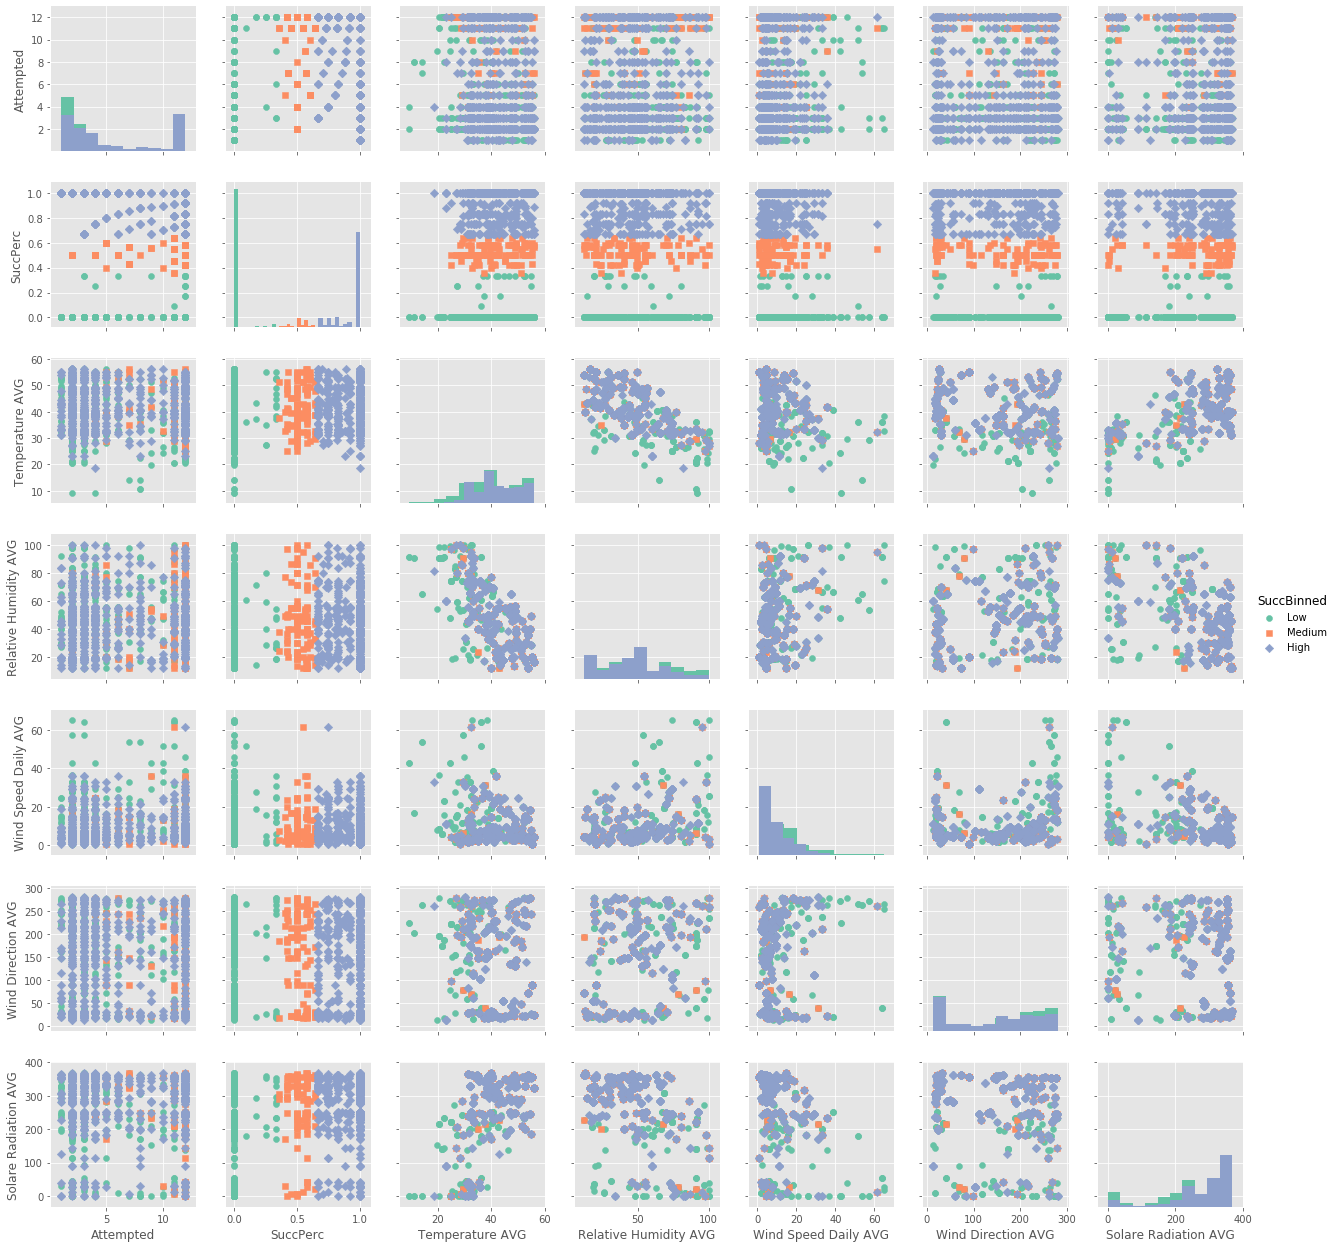

In [35]:
tp = df_disappointmentcleaver.drop(['Succeeded', 'Battery Voltage AVG'], axis=1)
g = sns.PairGrid(tp, hue='SuccBinned',
                 palette='Set2',
                 hue_order=['Low', 'Medium', 'High'], hue_kws = {"marker": ["o", "s", "D"]})

g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend();

del(tp)

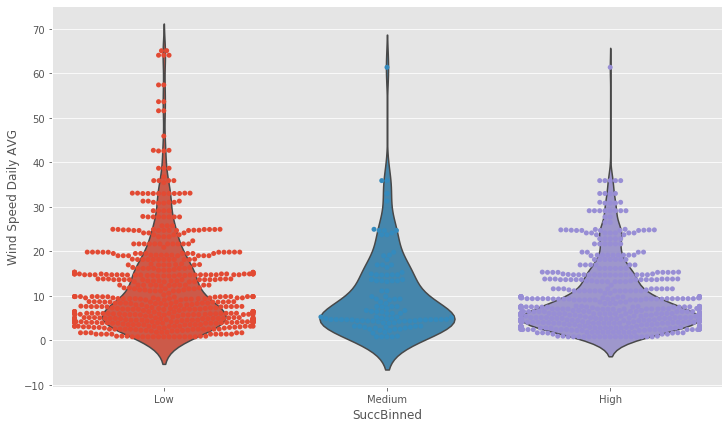

In [36]:
plt.figure(figsize=(12,7))
ax = sns.violinplot(x="SuccBinned", y='Wind Speed Daily AVG', data=df_disappointmentcleaver, inner=None)
ax = sns.swarmplot(x='SuccBinned', y='Wind Speed Daily AVG', data=df_disappointmentcleaver)

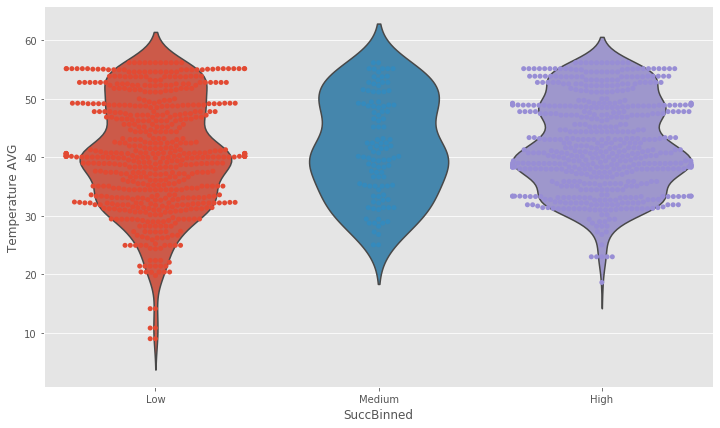

In [37]:
plt.figure(figsize=(12,7))
ax = sns.violinplot(x="SuccBinned", y="Temperature AVG", data=df_disappointmentcleaver, inner=None)
ax = sns.swarmplot(x='SuccBinned', y='Temperature AVG', data=df_disappointmentcleaver)

<h3>Conclusoin</h3>

To conclude, the prediction model I've managed to build has 60% accuracy. This is quite risky to use it in a real-world.<br>
To my mind, this is mainly because of lack of observations and the vast influence of the individual groups' climbing experience. This results to cases when the equal features' values point to different outcomes. Unfortunately, there is no data about how skilled the attempted groups were.